# Week 1

In [1]:
import pandas as pd
import numpy as np

## Load Dataset 

In [2]:
data = pd.read_csv(r'Indian_Kids_Screen_Time.csv')

In [3]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Check Null Values

In [4]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

## Check Duplicated Values

In [5]:
data.duplicated().sum()

44

In [6]:
df = pd.DataFrame(data)
print(df)


      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2                           True          

## Check Correlation

In [7]:
df.corr(numeric_only=True)


,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


## Check Info of Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


## Check Datatype of columns

In [9]:
data.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

## IQR for ML Models

In [10]:
numeric_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
outlier_flags = pd.DataFrame(index=df.index)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
outlier_flags[col + '_Outlier'] = ~df[col].between(lower_bound, upper_bound)
outlier_flags['Any_Outlier'] = outlier_flags.any(axis=1)
df_outliers = df.join(outlier_flags)
print("Outlier Counts:\n", outlier_flags.sum())
print("\nSample Outliers:\n", df_outliers[df_outliers['Any_Outlier']].head(10))


Outlier Counts:
 Educational_to_Recreational_Ratio_Outlier    0
Any_Outlier                                  0
dtype: int64

Sample Outliers:
 Empty DataFrame
Columns: [Age, Gender, Avg_Daily_Screen_Time_hr, Primary_Device, Exceeded_Recommended_Limit, Educational_to_Recreational_Ratio, Health_Impacts, Urban_or_Rural, Educational_to_Recreational_Ratio_Outlier, Any_Outlier]
Index: []


In [11]:
Q1 = df['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = df['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 1.9699999999999998


## Understanding of Week 1

## 1. Imported Dataset

Loaded the dataset with 9712 rows and 8 columns.

## 2. Checked for Missing Values

No empty values in main columns.
In Health_Impacts, 3218 rows have "None", so useful health data is limited.

## 3. Checked for Duplicates

Found 44 duplicate rows.

## 4. Checked for Duplicate Columns

No duplicate columns were found.

## 5. Correlation Check

Age has a small link with screen time (older kids use more).
Educational ratio decreases as total screen time increases.

## 6. IQR and Outliers

IQR of Avg_Daily_Screen_Time_hr = 1.97
Some kids reported very high screen time, which is not realistic.

## 7. Screen Time in Urban vs Rural

Urban: 4.38 hrs/day
Rural: 4.36 hrs/day
Little difference between the two areas.

## 8. Unique Entries in Columns

Gender: 2 (Male, Female)
Primary Device: 4 types
Urban or Rural: 2 (Urban, Rural)
Health Impacts: 16 values (some inconsistent).
Final Notes

Dataset is mostly clean.
Needs duplicate rows removed.
Health_Impacts values need fixing.
Urban and rural kids spend almost the same time on screens.

## Data Visualization (HeatMap)

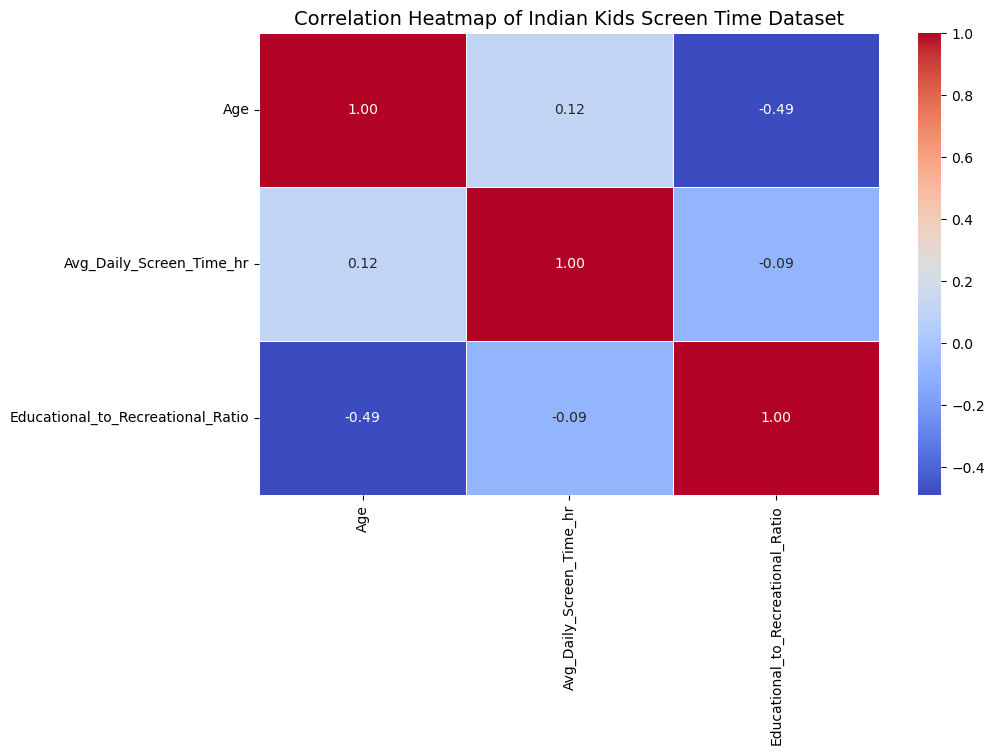

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Indian Kids Screen Time Dataset", fontsize=14)

# Show plot
plt.show()


# Week 2

In [13]:
#Categorising Age bands
df = df[df['Age'] >= 8]  
bins = [7, 12, 16, 18]
labels = ['Pre-teens', 'Teenagers', 'Late teens']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
print(df[['Age', 'Age_Group']].head())

   Age   Age_Group
0   14   Teenagers
1   11   Pre-teens
2   18  Late teens
3   15   Teenagers
4   12   Pre-teens


In [18]:
# changing position of the new inserted column
cols = df.columns.tolist()
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('Age_Group')))
df = df[cols]

print(df)

      Age   Age_Group  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14   Teenagers    Male                      3.99     Smartphone   
1      11   Pre-teens  Female                      4.61         Laptop   
2      18  Late teens  Female                      3.73             TV   
3      15   Teenagers  Female                      1.21         Laptop   
4      12   Pre-teens  Female                      5.89     Smartphone   
...   ...         ...     ...                       ...            ...   
9707   17  Late teens    Male                      3.26     Smartphone   
9708   17  Late teens  Female                      4.43     Smartphone   
9709   16   Teenagers    Male                      5.62     Smartphone   
9710   17  Late teens    Male                      5.60             TV   
9711   15   Teenagers  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True        

In [19]:
#crosschecking
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                                     0
Age_Group                               0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [31]:
#correcting null values with No health imapact
df['Health_Impacts'] = df['Health_Impacts'].fillna('No health impacts')
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [21]:
# categorising health impact in terms of its physical or mental impact 
physical = ["Eye Strain","Headache","Poor Posture","Obesity","Fatigue"]
mental = ["Poor Sleep","Anxiety","Stress","Depression","Addiction"]

df["Health_Impact_Category"] = df["Health_Impacts"].apply(
    lambda x: "No Impact" if x=="None" 
    else "Both Physical and Mental" if any(p in x for p in physical) and any(m in x for m in mental)
    else "Physical" if any(p in x for p in physical)
    else "Mental" if any(m in x for m in mental)
    else "No Impact"
)
df.head(10)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Health_Impact_Category
0,14,Teenagers,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Both Physical and Mental
1,11,Pre-teens,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Mental
2,18,Late teens,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Mental
3,15,Teenagers,Female,1.21,Laptop,False,0.39,No health impacts,Urban,No Impact
4,12,Pre-teens,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Mental
5,14,Teenagers,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Mental
6,17,Late teens,Male,2.97,TV,False,0.48,No health impacts,Rural,No Impact
7,10,Pre-teens,Male,2.74,TV,True,0.54,No health impacts,Urban,No Impact
8,14,Teenagers,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Mental
9,18,Late teens,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Both Physical and Mental


In [22]:
# changing position of the new inserted column
cols = df.columns.tolist()
cols.insert(cols.index('Health_Impacts') + 1, cols.pop(cols.index('Health_Impact_Category')))
df = df[cols]

print(df.head)

<bound method NDFrame.head of       Age   Age_Group  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14   Teenagers    Male                      3.99     Smartphone   
1      11   Pre-teens  Female                      4.61         Laptop   
2      18  Late teens  Female                      3.73             TV   
3      15   Teenagers  Female                      1.21         Laptop   
4      12   Pre-teens  Female                      5.89     Smartphone   
...   ...         ...     ...                       ...            ...   
9707   17  Late teens    Male                      3.26     Smartphone   
9708   17  Late teens  Female                      4.43     Smartphone   
9709   16   Teenagers    Male                      5.62     Smartphone   
9710   17  Late teens    Male                      5.60             TV   
9711   15   Teenagers  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0         

In [32]:
# categorising new column for better future usage 
def categorize_device(device):
    if device == 'TV':
        return 'Wallmounted'
    else:
        return 'Portable'
df['Device_Category'] = df['Primary_Device'].apply(categorize_device)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [33]:
# changing position of the new inserted column
device_cat = df.pop('Device_Category')
primary_idx = df.columns.get_loc('Primary_Device') + 1
df.insert(primary_idx, 'Device_Category', device_cat)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [34]:
# categorising new column for better future usage 
def screen_size(device):
    if device == 'TV':
        return '>30'
    elif device in ['Smartphone', 'Laptop', 'Tablet']:
        return '<30'
    else:
        return 'Unknown'  

df['Screen_Size'] = df['Primary_Device'].apply(screen_size)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [35]:
# changing position of the new inserted column
screen_size_col = df.pop('Screen_Size')
device_cat_index = df.columns.get_loc('Device_Category') + 1
df.insert(device_cat_index, 'Screen_Size', screen_size_col)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [28]:
# categorising new column for better future usage 
def awareness_level(screen_time):
    if 0 <= screen_time < 3:
        return 'No harm'
    elif 3 <= screen_time < 6:
        return 'Need Attention'
    elif 6 <= screen_time < 9:
        return 'Moderate Concern'
    elif 9 <= screen_time < 12:
        return 'High Concern'
    else:
        return 'Critical Concern'

df['awareness'] = df['Avg_Daily_Screen_Time_hr'].apply(awareness_level)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural,awareness
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban,Need Attention
1,11,Pre-teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban,Need Attention
2,18,Late teens,Female,3.73,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban,Need Attention
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban,No harm
4,12,Pre-teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban,Need Attention


In [29]:
# changing position of the new inserted column
awareness_col = df.pop('awareness')

index = df.columns.get_loc('Avg_Daily_Screen_Time_hr') + 1

df.insert(index, 'awareness', awareness_col)
df.head(5)

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,awareness,Primary_Device,Device_Category,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Impact_Category,Urban_or_Rural
0,14,Teenagers,Male,3.99,Need Attention,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain",Both Physical and Mental,Urban
1,11,Pre-teens,Female,4.61,Need Attention,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late teens,Female,3.73,Need Attention,TV,Wallmounted,>30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,No harm,Laptop,Portable,<30,False,0.39,No health impacts,No Impact,Urban
4,12,Pre-teens,Female,5.89,Need Attention,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban


In [30]:
# saving the updated data set
df.to_csv('Updated_Dataset.csv', index=False)

In [17]:
df.head()

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Pre-teens,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Late teens,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Teenagers,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Pre-teens,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


# Week 3


Week 3: Univariate and Bivariate Visual Analysis

This week, we will:
- Explore **distributions** of daily hours, age bands, and device usage.  
- **Compare screen time** by gender, age band, and location type.  
- Build **bar charts, histograms, boxplots, and line plots** for better insights.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (CSV format)
df = pd.read_csv("Indian_Kids_Screen_Time_Updated.csv")

# Rename columns for convenience
df = df.rename(columns={
    "Avg_Daily_Screen_Time_hr": "Daily_Hours",
    "Age_Group": "Age_Band",
    "Primary_Device": "Device",
    "Urban_or_Rural": "Location_Type"
})

# Preview dataset
df.head()


,Age,Age_Band,Gender,Daily_Hours,Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Location_Type
0,14,Teenagers,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Pre-teens,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Late teens,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Teenagers,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Pre-teens,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Univariate Visual Analysis

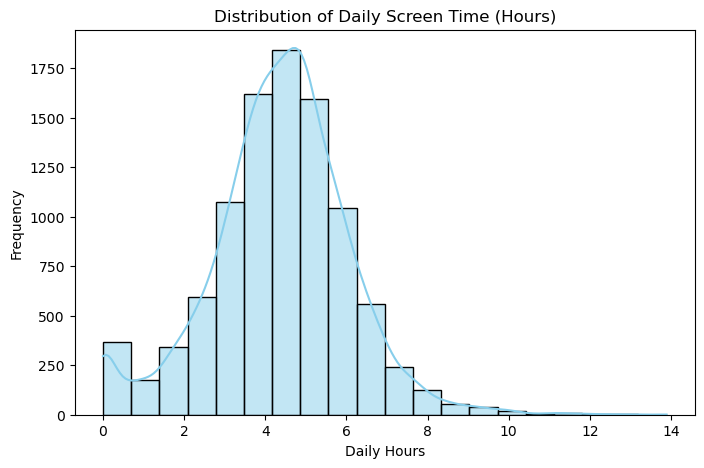

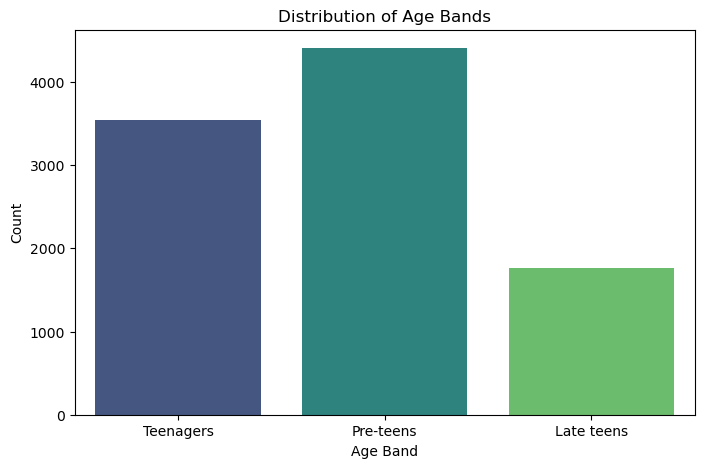

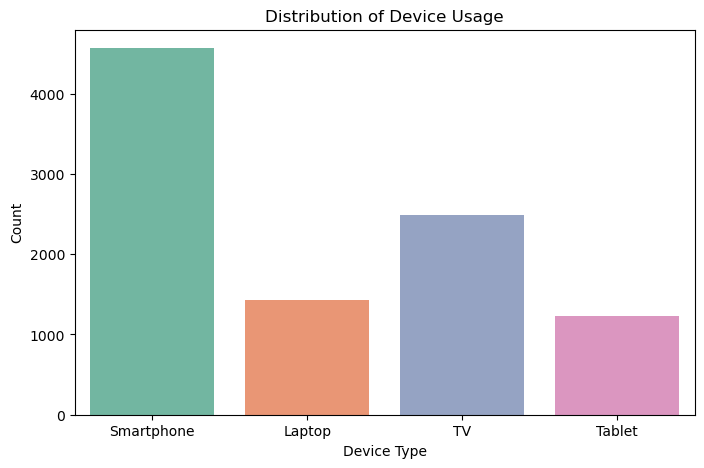

In [10]:
# Distribution of Daily Hours
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Hours'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Daily Screen Time (Hours)")
plt.xlabel("Daily Hours")
plt.ylabel("Frequency")
plt.show()

# Age Band distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Age_Band", hue="Age_Band", palette="viridis", legend=False)
plt.title("Distribution of Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.show()

# Device usage distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Device", hue="Device", palette="Set2", legend=False)
plt.title("Distribution of Device Usage")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()


## Bivariate Visual Analysis

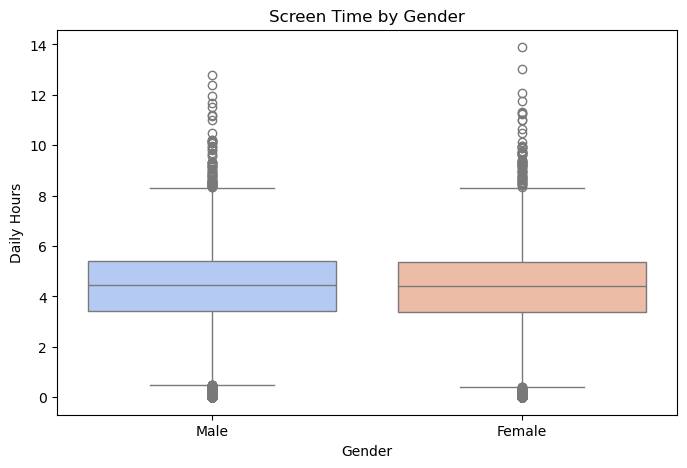

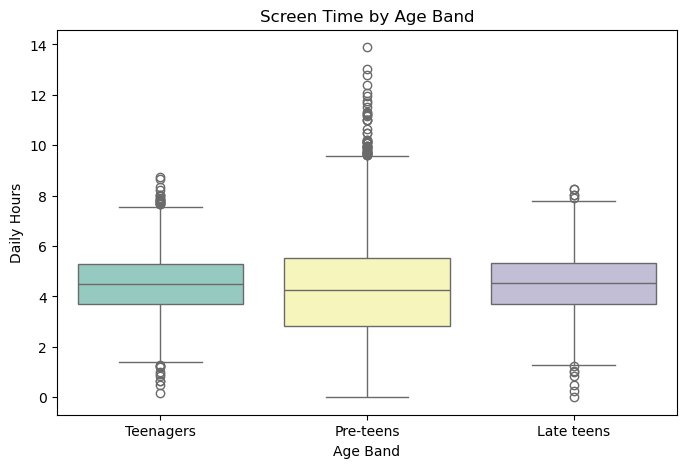

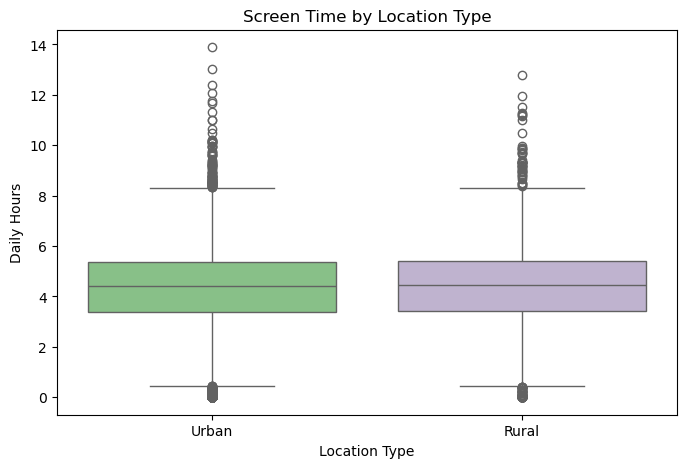

In [11]:
# Compare Screen Time by Gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Daily_Hours", hue="Gender", palette="coolwarm", legend=False)
plt.title("Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Daily Hours")
plt.show()

# Compare Screen Time by Age Band
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Age_Band", y="Daily_Hours", hue="Age_Band", palette="Set3", legend=False)
plt.title("Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Daily Hours")
plt.show()

# Compare Screen Time by Location Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Location_Type", y="Daily_Hours", hue="Location_Type", palette="Accent", legend=False)
plt.title("Screen Time by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Daily Hours")
plt.show()


## Line Plot (Average Screen Time by Age Band)

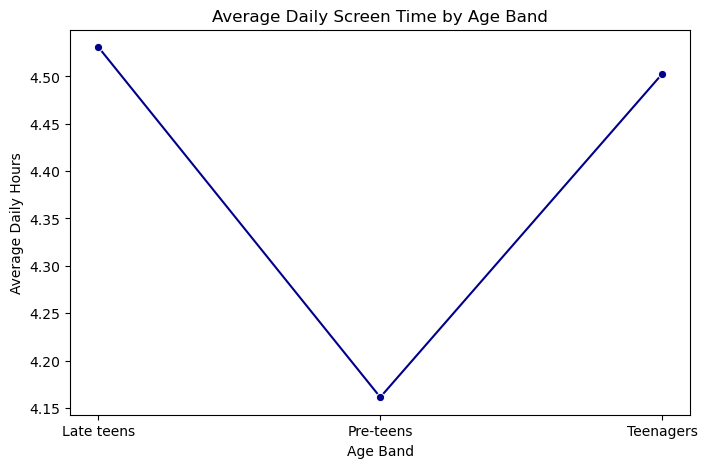

In [7]:
# Calculate average screen time per Age Band
avg_hours = df.groupby("Age_Band")["Daily_Hours"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=avg_hours, x="Age_Band", y="Daily_Hours", marker="o", color="darkblue")
plt.title("Average Daily Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Daily Hours")
plt.show()
